In [1]:
# System
import os

# Time
import time
import datetime

# Numerical
import numpy as np
import pandas as pd

# NLP
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# from pywsd.utils import lemmatize_sentence

# Preprocessing
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report

# Deep Learing Preprocessing - Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical

# Deep Learning Model - Keras
from keras.models import Model
from keras.models import Sequential
# Deep Learning Model - Keras - CNN
from keras.layers import Conv1D, Conv2D, Convolution1D, MaxPooling1D, SeparableConv1D, SpatialDropout1D, \
    GlobalAvgPool1D, GlobalMaxPool1D, GlobalMaxPooling1D 
from keras.layers.pooling import _GlobalPooling1D
from keras.layers import MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Embedding
from keras.layers import Input, Add, concatenate, Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.layers import LeakyReLU, PReLU, Lambda, Multiply



# Deep Learning Parameters - Keras
from keras.optimizers import RMSprop, Adam

# Deep Learning Callbacs - Keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from keras.layers import MaxPooling3D, GlobalMaxPooling3D, GlobalAveragePooling3D
# Visualization


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Using TensorFlow backend.
/opt/anaconda3/envs/tf2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/tf2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/tf2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/tf2/lib/python3.6/site-packages/t

# Load data

In [2]:
books_neg = pd.read_csv("sorted_data_acl/books/books_negative.csv")
books_pos = pd.read_csv("sorted_data_acl/books/books_positive.csv")
dvd_neg = pd.read_csv("sorted_data_acl/dvd/dvd_negative.csv")
dvd_pos = pd.read_csv("sorted_data_acl/dvd/dvd_positive.csv")
ele_neg = pd.read_csv("sorted_data_acl/electronics/electronics_negative.csv")
ele_pos = pd.read_csv("sorted_data_acl/electronics/electronics_positive.csv")
kit_neg = pd.read_csv("sorted_data_acl/kitchen_&_housewares/kitchen_negative.csv")
kit_pos = pd.read_csv("sorted_data_acl/kitchen_&_housewares/kitchen_positive.csv")

#dvd_test = pd.read_csv("sorted_data_acl/dvd/dvd_unlabeled.csv")
ele_test = pd.read_csv("sorted_data_acl/electronics/electronics_unlabeled.csv")
kit_test = pd.read_csv("sorted_data_acl/kitchen_&_housewares/kitchen_unlabeled.csv")

In [3]:
books_neg['label'] = 0 
books_pos['label'] = 1
books = pd.concat([books_neg,books_pos],axis = 0)
books['domain'] = 'books'
dvd_neg['label'] = 0
dvd_pos['label'] = 1
dvd = pd.concat([dvd_pos, dvd_neg],axis = 0)
dvd['domain'] = 'dvd'
ele_neg['label'] = 0
ele_pos['label'] = 1
ele = pd.concat([ele_neg, ele_pos],axis = 0)
ele['domain'] = 'electronics'
kit_neg['label'] = 0
kit_pos['label'] = 1
kit = pd.concat([kit_neg, kit_pos],axis = 0)
kit['domain'] = 'kitchen'
alldata = pd.concat([books,dvd,ele,kit])

In [4]:
books =books.reset_index(drop=True)
dvd =dvd.reset_index(drop=True)
ele =ele.reset_index(drop=True)
kit =kit.reset_index(drop=True)

# data cleaning

In [9]:
x_books = books['review_text']
y_books = books['label']

x_dvd = dvd['review_text']
y_dvd = dvd['label']

x_ele = ele['review_text']
y_ele = ele['label']

x_kit = kit['review_text']
y_kit = kit['label']

In [10]:
x_books.shape

(2000,)

In [11]:
def clean_doc(doc):
    #split into words
    tokens = word_tokenize(doc)
    #convert to lower case
    tokens = [w.lower() for w in tokens]
    #prepare regex for char filtering
    re_punc =re.compile('[%s]'% re.escape(string.punctuation))
    #remove punctuation
    stripped =[re_punc.sub('',w) for w in tokens]
    #filter out stop words
    #stop_words = set(stopwords.words('english'))
    #words =[w for w in words if not w in stop_words]
    #remove remaining tokens that are not alphabetic
    words = [w for w in stripped if w.isalpha()]
    #filter out short tokens
    tokens = [word for word in words if len(word)>1]
    return tokens

In [12]:
text_books = []
for m in range(0,len(x_books)):
    X = ''.join(str(i)for i in x_books[m])
    te = clean_doc(X)
    trainx = " ".join(te)
    text_books.append(trainx)

In [13]:
text_dvd = []
for m in range(0,len(x_dvd)):
    X = ''.join(str(i)for i in x_dvd[m])
    te = clean_doc(X)
    trainx = " ".join(te)
    text_dvd.append(trainx)

In [14]:
text_ele = []
for m in range(0,len(x_ele)):
    X = ''.join(str(i)for i in x_ele[m])
    te = clean_doc(X)
    trainx = " ".join(te)
    text_ele.append(trainx)

In [15]:
text_kit = []
for m in range(0,len(x_kit)):
    X = ''.join(str(i)for i in x_kit[m])
    te = clean_doc(X)
    trainx = " ".join(te)
    text_kit.append(trainx)

# simple CNN model

In [16]:
#pre process

In [17]:
label_encoder = LabelEncoder()

Y_books = label_encoder.fit_transform(y_books)
Y_books = to_categorical(Y_books)
Y_books.shape

(2000, 2)

In [18]:
Y_dvd = label_encoder.fit_transform(y_dvd)
Y_dvd = to_categorical(Y_dvd)
Y_dvd.shape

(2000, 2)

In [19]:
Y_ele = label_encoder.fit_transform(y_ele)
Y_ele = to_categorical(Y_ele)
Y_ele.shape

(2000, 2)

In [20]:
Y_kit = label_encoder.fit_transform(y_kit)
Y_kit = to_categorical(Y_kit)
Y_kit.shape

(2000, 2)

In [21]:
X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(text_books, Y_books, test_size=0.15)

In [22]:
max_words_b = len(set(" ".join(text_books).split()))
max_len_b = max([len(s.split()) for s in text_books])
max_words_b, max_len_b

(26106, 3227)

In [23]:
max_words_d = len(set(" ".join(text_dvd).split()))
max_len_d = max([len(s.split()) for s in text_dvd])
max_words_d, max_len_d

(25851, 1415)

In [24]:
max_words_e = len(set(" ".join(text_ele).split()))
max_len_e = max([len(s.split()) for s in text_ele])
max_words_e, max_len_e

(13490, 918)

In [25]:
max_words_k = len(set(" ".join(text_kit).split()))
max_len_k = max([len(s.split()) for s in text_kit])
max_words_k, max_len_k

(11674, 958)

In [26]:
max_words = max(max_words_b,max_words_d,max_words_e,max_words_k)
#max_len = max(max_len_b,max_len_d,max_len_e,max_len_k)
max_len = 200

In [27]:
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(X_train_b)

X_train_b_seq = tokenizer.texts_to_sequences(X_train_b)
X_train_b_seq = sequence.pad_sequences(X_train_b_seq, maxlen=max_len)


In [28]:
tokenizer.fit_on_texts(X_test_b)

X_test_b_seq = tokenizer.texts_to_sequences(X_test_b)
X_test_b_seq = sequence.pad_sequences(X_test_b_seq, maxlen=max_len)

In [29]:
X_train_b_seq.shape,X_test_b_seq.shape

((1700, 200), (300, 200))

In [30]:
def get_cnn_model(num_class=2):   
    model = Sequential()
    
    model.add(Embedding(max_words, 100, input_length=max_len))
    
    model.add(Conv1D(1024, 2, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPooling1D())
    
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(2048, activation='relu'))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(num_class, activation='softmax'))
    model.summary()
    return model

In [31]:
def plot_performance(history=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['acc']
    y2 = history.history['val_acc']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    plt.show()

### performance in one domain

In [32]:
loss = 'binary_crossentropy'
metrics = ['accuracy']

In [33]:
learning_rate = 0.01
optimizer = Adam(learning_rate)

In [34]:
num_class = 2
model1 = get_cnn_model(num_class=num_class)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          2610600   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 199, 1024)         205824    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              2099200   
__________

In [35]:
# fit network
model1.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history1 = model1.fit(X_train_b_seq, Y_train_b, validation_data=(X_test_b_seq, Y_test_b),batch_size=128,epochs=20)

Train on 1700 samples, validate on 300 samples
Epoch 1/20
1700/1700 [==============================] - 19s 11ms/step - loss: 2.4086 - acc: 0.4906 - val_loss: 1.6957 - val_acc: 0.4967
Epoch 2/20
1700/1700 [==============================] - 15s 9ms/step - loss: 2.4053 - acc: 0.5382 - val_loss: 1.4769 - val_acc: 0.5667
Epoch 3/20
1700/1700 [==============================] - 16s 9ms/step - loss: 1.9839 - acc: 0.6018 - val_loss: 2.2519 - val_acc: 0.5600
Epoch 4/20
1700/1700 [==============================] - 16s 10ms/step - loss: 1.6079 - acc: 0.6388 - val_loss: 1.4178 - val_acc: 0.6000
Epoch 5/20
1700/1700 [==============================] - 16s 10ms/step - loss: 1.3345 - acc: 0.6918 - val_loss: 1.4824 - val_acc: 0.5967
Epoch 6/20
1700/1700 [==============================] - 16s 10ms/step - loss: 1.1552 - acc: 0.7388 - val_loss: 2.0025 - val_acc: 0.5667
Epoch 7/20
1700/1700 [==============================] - 16s 10ms/step - loss: 0.8042 - acc: 0.8206 - val_loss: 2.5915 - val_acc: 0.5433
Epo

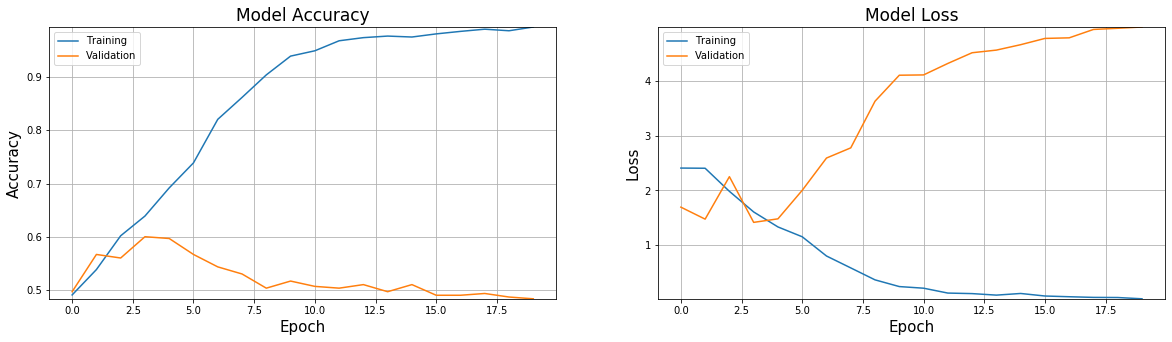

In [36]:
plot_performance(history=history1)

#### in multiple domain

In [37]:
tokenizer.fit_on_texts(text_books)

X_b_seq = tokenizer.texts_to_sequences(text_books)
X_b_seq = sequence.pad_sequences(X_b_seq, maxlen=max_len)

In [38]:
tokenizer.fit_on_texts(text_dvd)

X_d_seq = tokenizer.texts_to_sequences(text_dvd)
X_d_seq = sequence.pad_sequences(X_d_seq, maxlen=max_len)

In [39]:
tokenizer.fit_on_texts(text_ele)

X_e_seq = tokenizer.texts_to_sequences(text_ele)
X_e_seq = sequence.pad_sequences(X_e_seq, maxlen=max_len)

In [40]:
tokenizer.fit_on_texts(text_kit)

X_k_seq = tokenizer.texts_to_sequences(text_kit)
X_k_seq = sequence.pad_sequences(X_k_seq, maxlen=max_len)